<h1> Project 1 Computations <h1>

<i> <sub> The following data is computations for Yellow Cab Data from December 2017. CSVs can be found on the following page: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml .Dataframe work can be found in the python notebook titled December_Work_Final <sub> <i> 


<i> <sub>I wanna know whether people in NYC tip better or worse during the Holiday Season, which I defined as Christmas Eve - New Years, compared to the regular days of December. Let's find out! <sub> <i>

In [57]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from cycler import cycler
import os




In [51]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [52]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'verdana',
    'font.weight' : 'medium',
    'axes.titleweight' : 'heavy',
    
    'axes.titlesize' : 'large',
    
    "figure.facecolor": "#FFFFFF",
    "axes.facecolor": "#FFFFFF",
    "axes.grid" : True,
    "axes.grid.axis" : "y",
    "grid.color"    : "#C7C7C7",
    "grid.linewidth": 2,
    
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    
    "ytick.major.size": 0,     
    "ytick.minor.size": 0,
    
    "xtick.direction" : "in",
    "xtick.major.size" : 5,
    "xtick.color"      : "#191919",
    "xtick.major.pad"      : 4,      # distance to major tick label in points
    "xtick.minor.pad"      : 3.9,      # distance to the minor tick label in point
    
    "axes.edgecolor"    :"#191919",
    "axes.prop_cycle" : plt.cycler('color', ['#518595', '#009CD7', '#72D1F6', '#108F85','#F13E20', '#711300']),
    "axes.axisbelow" : True,
    
    "legend.loc": 'lower right'
                                   
    })



# First let's import my cleaned CSV and see what it looks like! 

In [53]:
December_2017 = pd.read_csv('December_2017_Final.csv')

In [54]:
December_2017

,VendorID,Pickup_Time,DropOff_Time,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Type_of_Day,Pickup_Borough,Pickup_Zone,Pickup_Service_Zone,DropOff_Borough,DropOff_Zone,DropOff_Service_Zone,Percentage_Tip
0,1,2017-12-01 00:01:46,2017-12-01 00:12:19,1,1.90,standard_rate,credit_card,9.0,2.05,12.35,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,22.777778
1,1,2017-12-01 00:28:57,2017-12-01 00:43:29,1,2.90,standard_rate,credit_card,12.5,2.75,16.55,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,22.000000
2,2,2017-12-01 00:51:57,2017-12-01 01:01:21,1,2.29,standard_rate,credit_card,9.5,1.00,11.80,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,10.526316
3,2,2017-12-01 00:30:00,2017-12-01 00:39:28,2,1.52,standard_rate,credit_card,8.5,1.67,11.47,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,19.647059
4,2,2017-12-01 00:14:25,2017-12-01 00:24:27,1,1.86,standard_rate,credit_card,8.5,1.96,11.76,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,23.058824
5,2,2017-12-01 00:19:32,2017-12-01 00:29:38,2,1.96,standard_rate,credit_card,9.0,2.06,12.36,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,22.888889
6,2,2017-12-01 00:11:18,2017-12-01 00:19:28,1,1.61,standard_rate,credit_card,8.0,1.86,11.16,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,23.250000
7,1,2017-12-01 00:41:01,2017-12-01 00:47:47,1,1.50,standard_rate,credit_card,7.0,2.00,10.30,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,28.571429
8,2,2017-12-01 00:16:10,2017-12-01 00:24:40,4,1.21,standard_rate,credit_card,7.0,1.66,9.96,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,23.714286
9,2,2017-12-01 00:19:34,2017-12-01 00:26:43,5,1.27,standard_rate,credit_card,7.0,1.66,9.96,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,23.714286


<h4> I feel like I should get these caveats off my chest first: <h4>
   
    1) "Type_of_Day" I know, to any sane person, this column would be weekends vs nonweekends. Even seems like that if you see the word "Workday" listed everywhere. Well, not to me it doesn't. Here workday simply means any day that isn't from the 24th of December to the 31st. Tis_the_season defines those days I've arbitrarily decided is when the holiday season can start. Originally, I wanted to start the Holiday season from when Hanukkah starts but my code was lagging if I asked it to do too much. So I guess we're going with the Christian holidays.... 
    
    2) The other thing i should mention: I've decided to group by Boroughs by PickUp_Location instead of DropOff location. I'll do a few computations to see how they're different. And maybe how I weave these computations it's gonna look like I'm saying X borough tips less than Y borough. I know, just cuz you're getting picked up and dropped off at X or Y borough doesn't mean you're from there or anything of that sort. But let's just go with it for now. 

## Question 1: What's the average tip in New York? (Let's look at what this looks like for both mean and median)

In [6]:
December_2017.Percentage_Tip.median().round()

22.0

In [7]:
December_2017.Percentage_Tip.mean().round()

21.0

## Question 2: Now let's look at average tips by borough : )

In [8]:
December_2017.groupby('Pickup_Borough').Percentage_Tip.median().round()

Pickup_Borough
Bronx            15.0
Brooklyn         22.0
EWR              25.0
Manhattan        22.0
Queens           22.0
Staten Island    24.0
Name: Percentage_Tip, dtype: float64

Oh wow! It seems like the Bronx tips considerably less than every other neighborhood. Newark seems to have some high tippers? Are those tourists coming into the city? Who knows. Data wont tell us that. 

## Question 3: Why dont we look at the means as well to see what they look like compared to the medians?

In [9]:
December_2017.groupby('Pickup_Borough').Percentage_Tip.mean().round()

Pickup_Borough
Bronx             13.0
Brooklyn          21.0
EWR              393.0
Manhattan         21.0
Queens            21.0
Staten Island     26.0
Name: Percentage_Tip, dtype: float64

Holysmokes Batman! We've got some heavy tippers in Newark. That's almost 4 times the tip!.Those are some crazy numbers. And I've filtered out cash tips so this isn't the case of some silly foreigners not understanding American money. (This being said, American money is hella confusing. WHY IS EVERYTHING THE SAME SIZE???). Anyways! Let's explore those astronomical tips at somepoint.

## Question 4: But first let's see how the above computations change if we filter by DropOff location instead? 

In [45]:
print('THESE ARE MEDIAN TIP PERCENTAGES BY DROPOFF BOROUGH:')

December_2017.groupby('DropOff_Borough').Percentage_Tip.median().round()

THESE ARE MEDIAN TIP PERCENTAGES BY DROPOFF BOROUGH:


DropOff_Borough
Bronx            19.0
Brooklyn         21.0
EWR              25.0
Manhattan        22.0
Queens           22.0
Staten Island    24.0
Name: Percentage_Tip, dtype: float64

In [11]:
print('THESE ARE MEAN TIP PERCENTAGES BY DROPOFF BOROUGH:')

December_2017.groupby('DropOff_Borough').Percentage_Tip.mean().round()

THESE ARE MEAN TIP PERCENTAGES BY DROPOFF BOROUGH:


DropOff_Borough
Bronx            15.0
Brooklyn         20.0
EWR              58.0
Manhattan        21.0
Queens           21.0
Staten Island    21.0
Name: Percentage_Tip, dtype: float64

Oh, interesting! So if we filter by DropOff boroughs it seems like the Bronx, in terms of Median tips, looks very similar to the other boroughs and Newark no longer looks astronomically high. The Bronx still lags behind the other boroughs and Newark still pulls ahead, but let's see what happens when we drop means into the mix. 

Wow! It seems like the Bronx's mean is still pretty low (albeit mariginally better than when we were filtering by Pickup locations). It seems to suggest that although a large number of people are tipping around 19 percent, there are people tipping much less than that dropping down our averages. 

On the other hand, if we look at Newark data, it seems to suggest the opposite of the Bronx. While a number of people are tippig around 25 percent (which is still higher than the average tip of 20 percent), some people are tipping astronomically more raising are average tips nearly 3 times the median tip of 25 percent. 

All of this seems interesting and worth exploring further. 

## Question 5: But first let's make some graphs?

<sub> 

A) Let's graph the median tips by borough

B) Repeat with a filter for DropOff Boroughs

<sub>
    

### Graph A: Median Tip of NYC by PickUp Borough

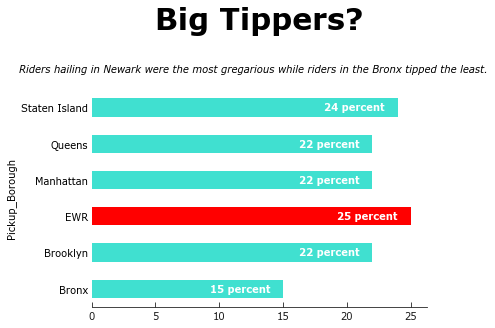

In [117]:
bar_colors = ['turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise' , 'turquoise']



ax = December_2017.groupby('Pickup_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("Big Tippers?", pad=60, fontsize=30)

ax.grid(False)


# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Riders hailing in Newark were the most gregarious while riders in the Bronx tipped the least.", ha='center', fontsize=10, fontstyle='italic')
for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')
    
plt.savefig('December_2017_Median_Pickup.svg')



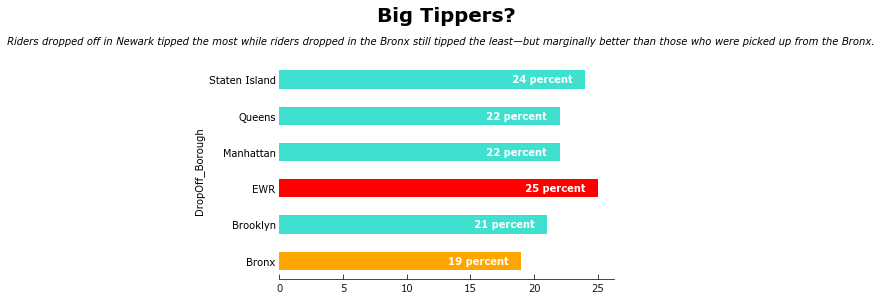

In [118]:
bar_colors = ['orange' , 'turquoise' , 'red' , 'turquoise' , 'turquoise' , 'turquoise']

ax = December_2017.groupby('DropOff_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("Big Tippers?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Riders dropped off in Newark tipped the most while riders dropped in the Bronx still tipped the least—but marginally better than those who were picked up from the Bronx.", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)



for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')
    
    

plt.savefig('December_2017_Median_DropOff.svg')



## Question 6: But what we really wanna know is how New Yorkers tip during the Holiday season versus the rest of the month. Let's plot and figure that out!

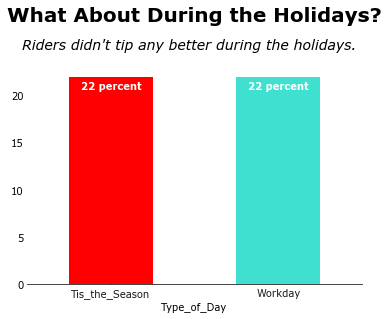

In [116]:
bar_colors = ['Red' , 'turquoise']

ax = December_2017.groupby('Type_of_Day').Percentage_Tip.median().round().plot(kind='bar', color=bar_colors , rot=0 , legend=False)

ax.set_title("What About During the Holidays?", pad=45, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Riders didn't tip any better during the holidays.", ha='center', fontsize=14, fontstyle='italic')



ax.grid(False)



for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_height()))) + ' percent'
    x_pos = i
    y_pos = bar.get_height() - .5
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='top', ha='center', color='white', fontweight='bold')
    
    
plt.savefig('December_2017_Median_Type_of_Day.svg')



In [15]:
December_2017.groupby('Type_of_Day').Percentage_Tip.median().round()

Type_of_Day
Tis_the_Season    22.0
Workday           22.0
Name: Percentage_Tip, dtype: float64

In [16]:
December_2017.groupby('Type_of_Day').Percentage_Tip.mean().round()

Type_of_Day
Tis_the_Season    21.0
Workday           21.0
Name: Percentage_Tip, dtype: float64

Well darn, I guess New Yorkers are pretty darn consistent with how they tip during the holidays versus how they tip on a regular day. 

## Question 7: But wouldn't it be cool to find out which borough tips best during the Holiday season?

In [17]:
December_2017_Holiday = December_2017[December_2017['Type_of_Day'] == 'Tis_the_Season']

In [18]:
December_2017_Holiday

,VendorID,Pickup_Time,DropOff_Time,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Type_of_Day,Pickup_Borough,Pickup_Zone,Pickup_Service_Zone,DropOff_Borough,DropOff_Zone,DropOff_Service_Zone,Percentage_Tip
4224,1,2017-12-24 00:36:20,2017-12-24 00:44:48,2,1.60,standard_rate,credit_card,8.0,2.70,12.00,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,33.750000
4225,1,2017-12-24 09:25:15,2017-12-24 09:30:34,1,1.10,standard_rate,credit_card,6.0,1.35,8.15,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,22.500000
4226,1,2017-12-24 09:54:35,2017-12-24 10:03:38,1,1.60,standard_rate,credit_card,8.5,1.00,10.30,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,11.764706
4227,1,2017-12-24 09:15:41,2017-12-24 09:19:21,3,1.20,standard_rate,credit_card,5.5,1.55,7.85,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,28.181818
4228,2,2017-12-24 10:33:28,2017-12-24 10:39:43,5,1.43,standard_rate,credit_card,7.0,1.56,9.36,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,22.285714
4229,1,2017-12-24 10:56:54,2017-12-24 11:06:09,1,2.10,standard_rate,credit_card,9.0,2.45,12.25,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,27.222222
4230,1,2017-12-24 10:37:19,2017-12-24 10:45:33,1,1.40,standard_rate,credit_card,7.5,1.00,9.30,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,13.333333
4231,2,2017-12-24 11:41:31,2017-12-24 11:50:18,1,1.49,standard_rate,credit_card,8.0,0.00,8.80,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,0.000000
4232,2,2017-12-24 11:56:03,2017-12-24 12:05:12,1,1.74,standard_rate,credit_card,8.5,1.86,11.16,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,21.882353
4233,1,2017-12-24 11:15:49,2017-12-24 11:24:39,1,1.90,standard_rate,credit_card,8.5,1.85,11.15,Tis_the_Season,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,21.764706


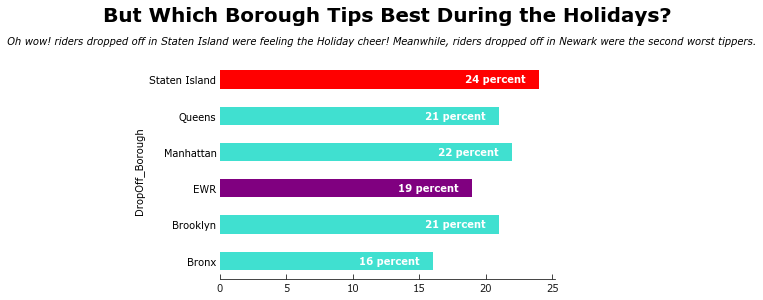

In [120]:
bar_colors = ['turquoise' , 'turquoise' , 'purple' , 'turquoise' , 'turquoise' , 'red']

ax = December_2017_Holiday.groupby('DropOff_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("But Which Borough Tips Best During the Holidays?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Oh wow! riders dropped off in Staten Island were feeling the Holiday cheer! Meanwhile, riders dropped off in Newark were the second worst tippers.", ha='center', fontsize=10, fontstyle='italic')

ax.grid(False)



for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')



# December_2017_Holiday.groupby('DropOff_Borough').Percentage_Tip.median().round().plot(kind='bar')


plt.savefig('December_Holiday_Median_DropOff.svg')


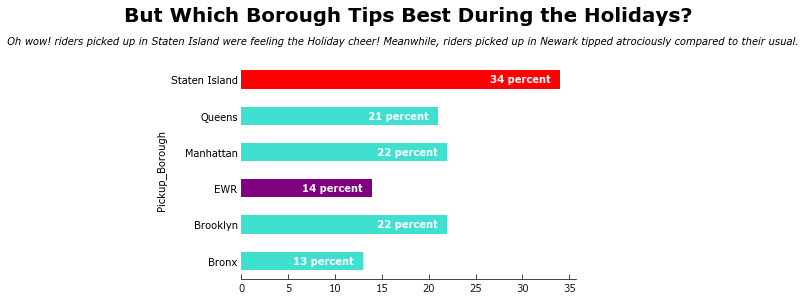

In [121]:
bar_colors = ['turquoise' , 'turquoise' , 'purple' , 'turquoise' , 'turquoise' , 'red']

ax = December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("But Which Borough Tips Best During the Holidays?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "", ha='center', fontsize=10, fontstyle='italic')

plt.gcf().text(0.5, 0.94, "Oh wow! riders picked up in Staten Island were feeling the Holiday cheer! Meanwhile, riders picked up in Newark tipped atrociously compared to their usual.", ha='center', fontsize=10, fontstyle='italic')



for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

ax.grid(False)    

# plt.show()

plt.savefig('December_Holiday_Median_Pickup.svg')


# December_2017_Holiday.groupby('DropOff_Borough').Percentage_Tip.median().round().plot(kind='bar')

In [21]:
December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.median().round()

Pickup_Borough
Bronx            13.0
Brooklyn         22.0
EWR              14.0
Manhattan        22.0
Queens           21.0
Staten Island    34.0
Name: Percentage_Tip, dtype: float64

In [22]:
December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.mean().round()

Pickup_Borough
Bronx            12.0
Brooklyn         20.0
EWR              14.0
Manhattan        21.0
Queens           21.0
Staten Island    34.0
Name: Percentage_Tip, dtype: float64

Wow, what's going on? Are people flying into New York for the holidays stingier than on any other day. Newark tips almost half what it tips usually. Let's explore this further by creating a dataset for just "workdays"

In [70]:
December_2017_Workday = December_2017[December_2017['Type_of_Day'] == 'Workday']

## Question 8: Why dont we plot what the average tips look like during a regular day

In [24]:
December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.median().round()

Pickup_Borough
Bronx            15.0
Brooklyn         22.0
EWR              25.0
Manhattan        22.0
Queens           22.0
Staten Island    22.0
Name: Percentage_Tip, dtype: float64

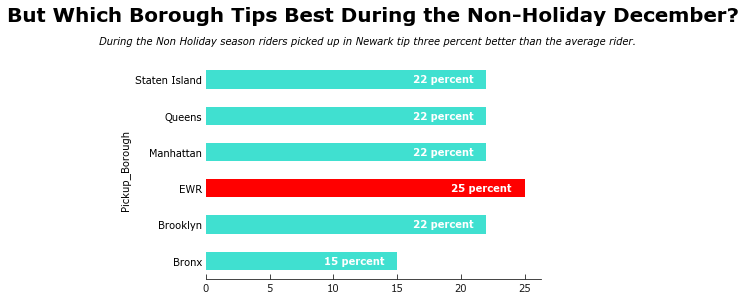

In [123]:
# December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.median().round().plot(kind='barh')




bar_colors = ['turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise' , 'turquoise']

ax = December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("But Which Borough Tips Best During the Non-Holiday December?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "During the Non Holiday season riders picked up in Newark tip three percent better than the average rider.", ha='center', fontsize=10, fontstyle='italic')




ax.grid(False)




for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

# plt.show()

plt.savefig('December_Non_Holiday_Median_Pickup.svg')



In [85]:
December_2017_Workday.Percentage_Tip.median().round()

22.0

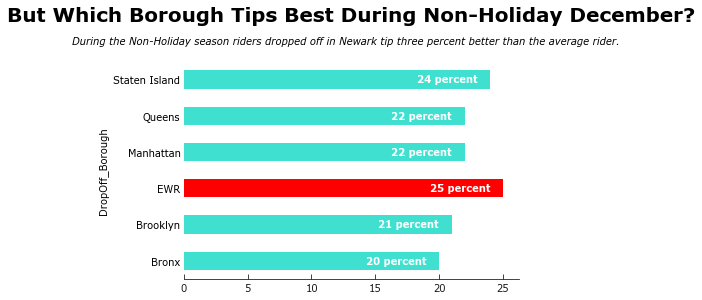

In [124]:
# December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.median().round().plot(kind='barh')




bar_colors = ['turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise' , 'turquoise']

ax = December_2017_Workday.groupby('DropOff_Borough').Percentage_Tip.median().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("But Which Borough Tips Best During Non-Holiday December?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "During the Non-Holiday season riders dropped off in Newark tip three percent better than the average rider.", ha='center', fontsize=10, fontstyle='italic')




ax.grid(False)




for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " percent"
    x_pos = bar.get_width() - 1
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

# plt.show()

plt.savefig('December_Non_Holiday_Median_DropOff.svg')



## Question 9: What's the maximum tip for the Holidays vs Non Holidays?

Here's the maximum tip for Non Holidays by Borough


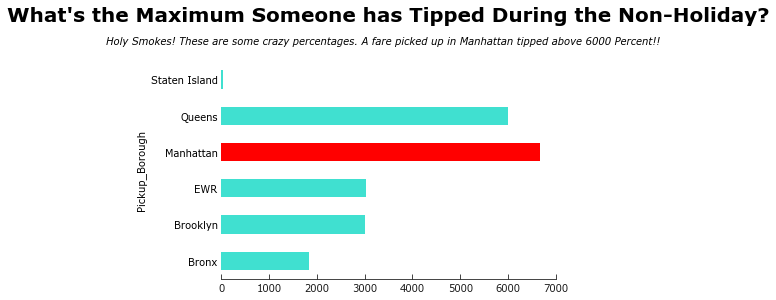

In [126]:
print('Here\'s the maximum tip for Non Holidays by Borough')


# December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')



bar_colors = ['turquoise' , 'turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise']

ax = December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("What's the Maximum Someone has Tipped During the Non-Holiday?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Holy Smokes! These are some crazy percentages. A fare picked up in Manhattan tipped above 6000 Percent!!", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')





plt.savefig('December_Non_Holiday_Max_Pickup.svg')


In [27]:
December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.max().round()

Pickup_Borough
Bronx            1848.0
Brooklyn         3000.0
EWR              3040.0
Manhattan        6667.0
Queens           6000.0
Staten Island      43.0
Name: Percentage_Tip, dtype: float64

Here's the maximum tip for Non Holidays by Borough


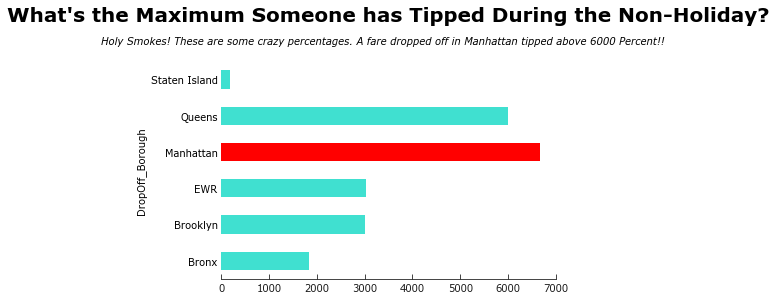

In [127]:
print('Here\'s the maximum tip for Non Holidays by Borough')


# December_2017_Workday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')



bar_colors = ['turquoise' , 'turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise']

ax = December_2017_Workday.groupby('DropOff_Borough').Percentage_Tip.max().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("What's the Maximum Someone has Tipped During the Non-Holiday?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Holy Smokes! These are some crazy percentages. A fare dropped off in Manhattan tipped above 6000 Percent!!", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')




plt.savefig('December_Non_Holiday_Max_DropOff.svg')






Wow! Those numbers are pretty astronomical...besides I guess, Staten Island. Let's see what these numbers look like for the holidays. 



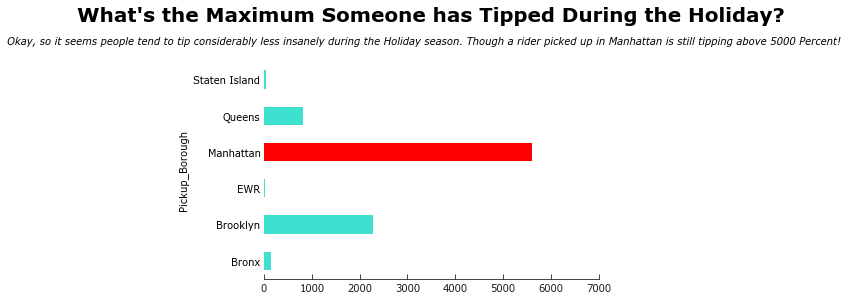

In [128]:
# December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')





bar_colors = ['turquoise' , 'turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise']

ax = December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("What's the Maximum Someone has Tipped During the Holiday?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Okay, so it seems people tend to tip considerably less insanely during the Holiday season. Though a rider picked up in Manhattan is still tipping above 5000 Percent! ", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')


ax.set_xticks([0 , 1000, 2000, 3000, 4000, 5000, 6000, 7000])


plt.savefig('December_Holiday_Max_Pickup.svg')













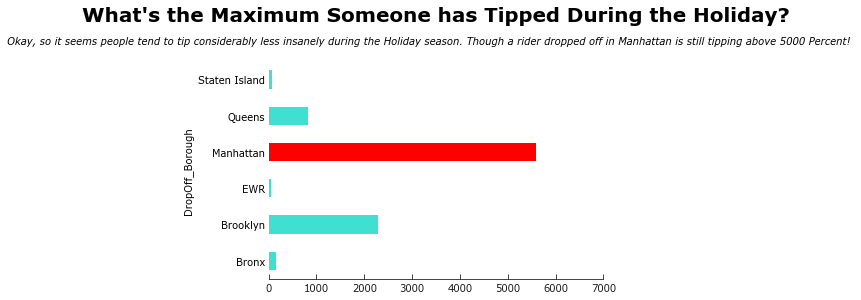

In [130]:
# December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')





bar_colors = ['turquoise' , 'turquoise' , 'turquoise' , 'red' , 'turquoise' , 'turquoise']

ax = December_2017_Holiday.groupby('DropOff_Borough').Percentage_Tip.max().round().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("What's the Maximum Someone has Tipped During the Holiday?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Okay, so it seems people tend to tip considerably less insanely during the Holiday season. Though a rider dropped off in Manhattan is still tipping above 5000 Percent! ", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')


ax.set_xticks([0 , 1000, 2000, 3000, 4000, 5000, 6000, 7000])


plt.savefig('December_Holiday_Max_DropOff.svg')













In [29]:
December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round()

Pickup_Borough
Bronx             143.0
Brooklyn         2280.0
EWR                29.0
Manhattan        5600.0
Queens            824.0
Staten Island      34.0
Name: Percentage_Tip, dtype: float64

## Question 10: Those numbers above are pretty astronomical. Remember those are percentages. Let's see how many people tip above 100 percent


In [30]:
All_Tips_Above_100 = December_2017[December_2017['Percentage_Tip'] > 100]

In [31]:
All_Tips_Above_100

,VendorID,Pickup_Time,DropOff_Time,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Type_of_Day,Pickup_Borough,Pickup_Zone,Pickup_Service_Zone,DropOff_Borough,DropOff_Zone,DropOff_Service_Zone,Percentage_Tip
1773,2,2017-12-10 20:33:09,2017-12-10 20:40:35,1,1.34,standard_rate,credit_card,7.0,15.00,23.30,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,214.285714
2263,2,2017-12-13 07:33:33,2017-12-13 07:43:12,1,1.62,standard_rate,credit_card,8.5,10.00,19.30,Workday,Manhattan,Midtown Center,Yellow Zone,Manhattan,Gramercy,Yellow Zone,117.647059
4957,1,2017-12-01 00:31:52,2017-12-01 00:31:55,1,1.90,standard_rate,credit_card,2.5,6.20,10.00,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,248.000000
4965,1,2017-12-01 10:28:12,2017-12-01 10:28:14,1,1.20,standard_rate,credit_card,2.5,5.00,8.30,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,200.000000
5054,1,2017-12-03 04:56:38,2017-12-03 04:56:56,1,1.20,standard_rate,credit_card,2.5,3.20,7.00,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,128.000000
5081,1,2017-12-04 10:49:55,2017-12-04 10:49:57,1,1.20,standard_rate,credit_card,2.5,6.50,9.80,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,260.000000
5187,1,2017-12-08 06:19:53,2017-12-08 06:19:56,1,3.40,standard_rate,credit_card,2.5,10.00,13.30,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,400.000000
5244,2,2017-12-09 12:08:09,2017-12-09 12:15:10,1,0.84,standard_rate,credit_card,6.5,18.88,26.18,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,290.461538
5416,1,2017-12-13 13:44:35,2017-12-13 13:44:37,1,1.40,standard_rate,credit_card,2.5,5.00,8.30,Workday,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,200.000000
5746,1,2017-12-24 22:57:41,2017-12-24 23:04:40,1,0.90,standard_rate,credit_card,6.5,10.00,17.80,Tis_the_Season,Manhattan,Gramercy,Yellow Zone,Manhattan,Gramercy,Yellow Zone,153.846154


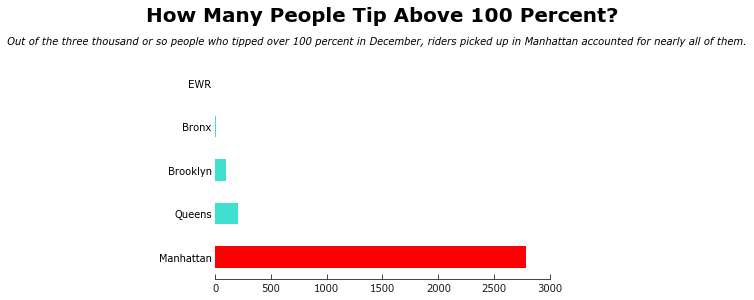

In [135]:
# December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')





bar_colors = ['red' , 'turquoise' , 'turquoise' , 'turquoise' , 'turquoise' , 'turquoise']

ax = All_Tips_Above_100.Pickup_Borough.value_counts().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("How Many People Tip Above 100 Percent?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Out of the three thousand or so people who tipped over 100 percent in December, riders picked up in Manhattan accounted for nearly all of them.", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')


ax.set_xticks([0 , 500 , 1000 , 1500 , 2000, 2500 , 3000])

# plt.show()








plt.savefig('All_Above_100_Pickup.svg')






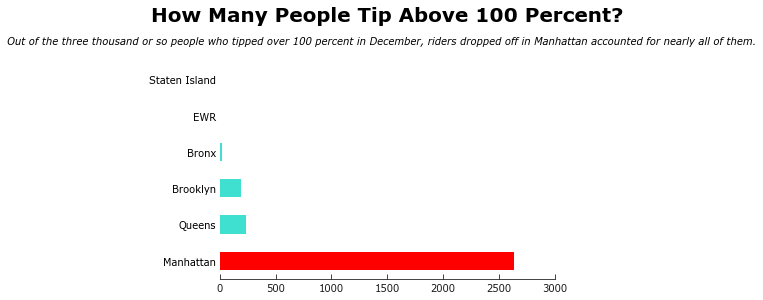

In [136]:
# December_2017_Holiday.groupby('Pickup_Borough').Percentage_Tip.max().round().plot(kind='bar')





bar_colors = ['red' , 'turquoise' , 'turquoise' , 'turquoise' , 'turquoise' , 'turquoise']

ax = All_Tips_Above_100.DropOff_Borough.value_counts().plot(kind='barh', color=bar_colors , rot=0 , legend=False)


ax.set_title("How Many People Tip Above 100 Percent?", pad=40, fontsize=20)

# I forgot to do fig, ax = plt.subplots(), but please give me the figure
# 0.2 means 20% of the way from left -> right
# 0.95 means 95% of the way from bottom -> top
# If you do an x position of 0.5 and ha='center', you center it
plt.gcf().text(0.5, 0.94, "Out of the three thousand or so people who tipped over 100 percent in December, riders dropped off in Manhattan accounted for nearly all of them.", ha='center', fontsize=10, fontstyle='italic')


ax.grid(False)

# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width()))) + " percent"
#     x_pos = bar.get_width() - 1
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')


ax.set_xticks([0 , 500 , 1000 , 1500 , 2000, 2500 , 3000])

# plt.show()








plt.savefig('All_Above_100_DropOff.svg')






Yowza! More than 3,000 people tipped above 100 percent in December 2017. Let's break this down by workday vs holiday

In [32]:
Workday_100 = All_Tips_Above_100[All_Tips_Above_100['Type_of_Day'] == 'Workday']

In [33]:
Holiday_100 = All_Tips_Above_100[All_Tips_Above_100['Type_of_Day'] == 'Tis_the_Season']

## Question 11: Let's see how many people by borough tip more than 100 percent during the holiday and workday

In [34]:
Workday_100.Pickup_Borough.value_counts()

Manhattan    2197
Queens        164
Brooklyn       76
Bronx           3
EWR             2
Name: Pickup_Borough, dtype: int64

In [35]:
Workday_100.Pickup_Borough.value_counts().plot(kind='bar')

Manhattan seems to dominate during the Workday. Howabout during the Holiday?


In [36]:
Holiday_100.Pickup_Borough.value_counts()

Manhattan    589
Queens        44
Brooklyn      18
Bronx          1
Name: Pickup_Borough, dtype: int64

In [37]:
Holiday_100.Pickup_Borough.value_counts().plot(kind='bar')

Man, Newark doesnt even make it into this graph : / 

In [38]:
December_2017.Pickup_Borough.value_counts()

Manhattan        4632171
Queens            262416
Brooklyn           64572
Bronx               2253
EWR                    9
Staten Island          8
Name: Pickup_Borough, dtype: int64

In [107]:
Percentages_tip_over_100_holiday = Holiday_100.Pickup_Borough.value_counts() / December_2017.Pickup_Borough.value_counts() * 100

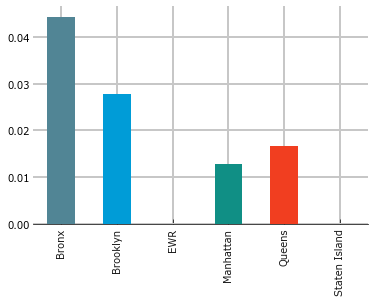

In [108]:
Percentages_tip_over_100_holiday.plot(kind='bar')

In [41]:
Percentages_tip_over_100_holiday

Bronx            0.044385
Brooklyn         0.027876
EWR                   NaN
Manhattan        0.012715
Queens           0.016767
Staten Island         NaN
Name: Pickup_Borough, dtype: float64

<i> This would be impressive, except there's only one guy that tipped over 100 percent from the Bronx. And there are fewer rides in the bronx anyways <i>